In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import scipy.stats as st



In [2]:
# Import, read, and write data frames

df1 = pd.read_csv("Resources/co2_emission.csv")

In [3]:
# Display the DataFrame for CO2 Emissions
df1.head()

,Vehicle Identifier,Total fuel consumed (lifetime) (l),Total distance travelled (lifetime) (km),Country,Mk,Cn,Ewltp (g/km),Ft,Erwltp (g/km),Year,Fuel consumption
0,537351,440.70,6906.1,DE,FORD,PUMA,127.0,PETROL,2.1,2021,5.6
1,537352,794.16,8915.6,DE,FORD,PUMA,155.0,PETROL,2.3,2021,6.8
2,537354,373.82,6004.8,DE,FORD,PUMA,127.0,PETROL,2.1,2021,5.6
3,537357,299.77,4087.2,DE,FORD,PUMA,129.0,PETROL,2.1,2021,5.7
4,537358,498.75,6076.6,DE,FORD,PUMA,138.0,PETROL,2.3,2021,6.1


In [4]:
# Pre-process and clean CO2 Emissions data set 
# Drop non-essential columns
co2_df = df1.copy()
co2_df = co2_df[['Vehicle Identifier', 'Total fuel consumed (lifetime) (l)', 
                 'Total distance travelled (lifetime) (km)', 'Country','Mk', 
                 'Cn', 'Ewltp (g/km)', 'Ft', 'Erwltp (g/km)', 'Year', 
                 'Fuel consumption']]
# Rename columns
co2_df = co2_df.rename(columns={'Mk': 'Brand', 'Ewltp (g/km)': 'CO2 Emissions (per WLTP)', 'Ft': 'Fuel Type'})
co2_df.columns

Index(['Vehicle Identifier', 'Total fuel consumed (lifetime) (l)',
       'Total distance travelled (lifetime) (km)', 'Country', 'Brand', 'Cn',
       'CO2 Emissions (per WLTP)', 'Fuel Type', 'Erwltp (g/km)', 'Year',
       'Fuel consumption'],
      dtype='object')

In [5]:
# Display unique values in Brand
unique_items = co2_df['Brand'].unique()
unique_items

array(['FORD', 'VOLVO', 'SEAT', 'CUPRA', 'BMW', 'FORD (D)', 'LAND ROVER',
       'JAGUAR', 'NISSAN', 'POLESTAR', 'FIAT', 'JEEP', 'LANCIA',
       'Land Rover', 'KIA', 'AUDI', 'Audi', 'Jaguar',
       'NILSSON XC90 AMBULANS', 'NILSSON', 'PEUGEOT', 'ABARTH', 'BENTLEY',
       'RENAULT', 'DACIA', 'VOLKSWAGEN', 'Ford', 'Dacia', 'Seat',
       'PORSCHE', 'HYUNDAI', 'Hyundai', 'FERRARI', 'Volvo', 'Porsche',
       'SIN MARCA', 'MAZDA', 'TRIPOD', 'SUZUKI', 'TOYOTA', 'LEXUS',
       'Mazda', 'MINI', 'MERCEDES-BENZ', 'LAND  ROVER', 'Cupra',
       'FORD-CNG-TECHNIK', 'VOLKSWAGEN, VW', 'FORD-CNG TECHNIK',
       'Rolls-Royce', 'FORD - CNG-TECHNIK', 'Ford-CNG-Technik', 'OPEL',
       'MERCEDES AMG', 'Opel / Vauxhall', 'LANDROVER LTD', 'LANDROVER',
       'VOLKSWAGEN  VW', 'Volkswagen', 'VOLKSWAGEN VW', 'VW',
       'VOLKSWAGEN. VW', 'VOLKSWAGEN,VW'], dtype=object)

In [6]:

# Standardize Brands
# List of brands to consider, with possible variations
brands = [
    'FORD', 'VOLVO', 'SEAT', 'CUPRA', 'BMW', 'FORD (D)', 'LAND ROVER',
    'JAGUAR', 'NISSAN', 'POLESTAR', 'FIAT', 'JEEP', 'LANCIA',
    'Land Rover', 'KIA', 'AUDI', 'Audi', 'Jaguar',
    'NILSSON XC90 AMBULANS', 'NILSSON', 'PEUGEOT', 'ABARTH', 'BENTLEY',
    'RENAULT', 'DACIA', 'VOLKSWAGEN', 'Ford', 'Dacia', 'Seat',
    'PORSCHE', 'HYUNDAI', 'Hyundai', 'FERRARI', 'Volvo', 'Porsche',
    'SIN MARCA', 'MAZDA', 'TRIPOD', 'SUZUKI', 'TOYOTA', 'LEXUS',
    'Mazda', 'MINI', 'MERCEDES-BENZ', 'LAND  ROVER', 'Cupra',
    'FORD-CNG-TECHNIK', 'VOLKSWAGEN, VW', 'FORD-CNG TECHNIK',
    'Rolls-Royce', 'FORD - CNG-TECHNIK', 'Ford-CNG-Technik', 'OPEL',
    'MERCEDES AMG', 'Opel / Vauxhall', 'LANDROVER LTD', 'LANDROVER',
    'VOLKSWAGEN  VW', 'Volkswagen', 'VOLKSWAGEN VW', 'VW',
    'VOLKSWAGEN. VW', 'VOLKSWAGEN,VW'
]

# Standardize brand names in the DataFrame for consistency
co2_df['Brand'] = co2_df['Brand'].str.upper().str.strip()

# Map of brand variations to standard names
brand_mapping = {
    'FORD': 'FORD', 'FORD (D)': 'FORD', 'FORD-CNG-TECHNIK': 'FORD',
    'FORD - CNG-TECHNIK': 'FORD', 'Ford': 'FORD', 'Ford-CNG-Technik': 'FORD',
    'VOLVO': 'VOLVO', 'Volvo': 'VOLVO',
    'SEAT': 'SEAT', 'Seat': 'SEAT',
    'CUPRA': 'CUPRA', 'Cupra': 'CUPRA',
    'BMW': 'BMW',
    'LAND ROVER': 'LAND ROVER', 'Land Rover': 'LAND ROVER', 'LAND  ROVER': 'LAND ROVER',
    'LANDROVER LTD': 'LAND ROVER', 'LANDROVER': 'LAND ROVER',
    'JAGUAR': 'JAGUAR', 'Jaguar': 'JAGUAR',
    'NISSAN': 'NISSAN',
    'POLESTAR': 'POLESTAR',
    'FIAT': 'FIAT',
    'JEEP': 'JEEP',
    'LANCIA': 'LANCIA',
    'KIA': 'KIA',
    'AUDI': 'AUDI', 'Audi': 'AUDI',
    'NILSSON XC90 AMBULANS': 'NILSSON', 'NILSSON': 'NILSSON',
    'PEUGEOT': 'PEUGEOT',
    'ABARTH': 'ABARTH',
    'BENTLEY': 'BENTLEY',
    'RENAULT': 'RENAULT',
    'DACIA': 'DACIA', 'Dacia': 'DACIA',
    'VOLKSWAGEN': 'VOLKSWAGEN', 'VOLKSWAGEN, VW': 'VOLKSWAGEN', 'VOLKSWAGEN VW': 'VOLKSWAGEN',
    'VW': 'VOLKSWAGEN', 'VOLKSWAGEN. VW': 'VOLKSWAGEN', 'VOLKSWAGEN,VW': 'VOLKSWAGEN',
    'PORSCHE': 'PORSCHE', 'Porsche': 'PORSCHE',
    'HYUNDAI': 'HYUNDAI', 'Hyundai': 'HYUNDAI',
    'FERRARI': 'FERRARI',
    'MAZDA': 'MAZDA', 'Mazda': 'MAZDA',
    'MINI': 'MINI',
    'MERCEDES-BENZ': 'MERCEDES-BENZ', 'MERCEDES AMG': 'MERCEDES-BENZ',
    'OPEL': 'OPEL',
    'ROLLS-ROYCE': 'ROLLS-ROYCE',
    'SIN MARCA': 'SIN MARCA',
    'SUZUKI': 'SUZUKI',
    'TOYOTA': 'TOYOTA',
    'LEXUS': 'LEXUS',
    'TRIPOD': 'TRIPOD'
}

# Standardize brand names in the DataFrame using the mapping
co2_df['Brand'] = co2_df['Brand'].map(lambda x: brand_mapping.get(x, x))

# Filter the DataFrame for the selected brands
co2_filtered_df = co2_df[co2_df['Brand'].isin(set(brand_mapping.values()))]
co2_filtered_df

,Vehicle Identifier,Total fuel consumed (lifetime) (l),Total distance travelled (lifetime) (km),Country,Brand,Cn,CO2 Emissions (per WLTP),Fuel Type,Erwltp (g/km),Year,Fuel consumption
0,537351,440.70,6906.1,DE,FORD,PUMA,127.0,PETROL,2.1,2021,5.6
1,537352,794.16,8915.6,DE,FORD,PUMA,155.0,PETROL,2.3,2021,6.8
2,537354,373.82,6004.8,DE,FORD,PUMA,127.0,PETROL,2.1,2021,5.6
3,537357,299.77,4087.2,DE,FORD,PUMA,129.0,PETROL,2.1,2021,5.7
4,537358,498.75,6076.6,DE,FORD,PUMA,138.0,PETROL,2.3,2021,6.1
...,...,...,...,...,...,...,...,...,...,...,...
808070,243471,1.00,4.0,SE,VOLVO,V60 CROSS COUNTRY,157.0,DIESEL,NaN,2021,NaN
808071,252770,1751.00,32062.0,SE,VOLVO,V60 CROSS COUNTRY,158.0,DIESEL,NaN,2021,NaN
808072,178333,1.00,4.0,SE,VOLVO,V60 CROSS COUNTRY,158.0,DIESEL,NaN,2021,NaN
808073,234114,1.00,6.0,SE,VOLVO,V60 CROSS COUNTRY,157.0,DIESEL,NaN,2021,NaN


In [7]:
# List of brands and their corresponding average prices
price_values = {
    'FORD': 35000,
    'VOLVO': 40000,
    'SEAT': 25000,
    'CUPRA': 35000,
    'BMW': 50000,
    'LAND ROVER': 70000,
    'JAGUAR': 55000,
    'NISSAN': 30000,
    'POLESTAR': 55000,
    'FIAT': 22000,
    'JEEP': 35000,
    'LANCIA': 25000,
    'KIA': 8000,
    'AUDI': 45000,
    'NILSSON': 0,
    'PEUGEOT': 30000,
    'ABARTH': 30000,
    'BENTLEY': 250000,
    'RENAULT': 25000,
    'DACIA': 20000,
    'VOLKSWAGEN': 30000,
    'PORSCHE': 80000,
    'HYUNDAI': 30000,
    'FERRARI': 275000,
    'MAZDA': 27000,
    'MINI': 30000,
    'MERCEDES-BENZ': 45000,
    'OPEL': 25000,
    'ROLLS-ROYCE': 350000,
    'SIN MARCA': 25000,
    'SUZUKI': 20000,
    'TOYOTA': 35000,
    'LEXUS': 50000,
    'TRIPOD': 0,
}

# Use a lambda function to assign prices based on the brand
co2_filtered_df['Average Price'] = co2_filtered_df['Brand'].apply(lambda x: price_values.get(x, 0))
co2_filtered_df.head(5)

/var/folders/__/tfzfy7bn5wg1by3trgv23_yr0000gn/T/ipykernel_76882/2705173847.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_filtered_df['Average Price'] = co2_filtered_df['Brand'].apply(lambda x: price_values.get(x, 0))


,Vehicle Identifier,Total fuel consumed (lifetime) (l),Total distance travelled (lifetime) (km),Country,Brand,Cn,CO2 Emissions (per WLTP),Fuel Type,Erwltp (g/km),Year,Fuel consumption,Average Price
0,537351,440.70,6906.1,DE,FORD,PUMA,127.0,PETROL,2.1,2021,5.6,35000
1,537352,794.16,8915.6,DE,FORD,PUMA,155.0,PETROL,2.3,2021,6.8,35000
2,537354,373.82,6004.8,DE,FORD,PUMA,127.0,PETROL,2.1,2021,5.6,35000
3,537357,299.77,4087.2,DE,FORD,PUMA,129.0,PETROL,2.1,2021,5.7,35000
4,537358,498.75,6076.6,DE,FORD,PUMA,138.0,PETROL,2.3,2021,6.1,35000


In [8]:
# Display dtypes of CO2 emissions dataset
co2_filtered_df.dtypes

Vehicle Identifier                            int64
Total fuel consumed (lifetime) (l)          float64
Total distance travelled (lifetime) (km)    float64
Country                                      object
Brand                                        object
Cn                                           object
CO2 Emissions (per WLTP)                    float64
Fuel Type                                    object
Erwltp (g/km)                               float64
Year                                          int64
Fuel consumption                            float64
Average Price                                 int64
dtype: object

In [9]:
# Drop all rows with missing information in CO2 Emissions data set
co2_filtered_df = co2_filtered_df.dropna(how='any')
co2_filtered_df.value_counts

<bound method DataFrame.value_counts of         Vehicle Identifier  Total fuel consumed (lifetime) (l)  \
0                   537351                              440.70   
1                   537352                              794.16   
2                   537354                              373.82   
3                   537357                              299.77   
4                   537358                              498.75   
...                    ...                                 ...   
807894               64291                              794.21   
807952              216018                              691.00   
807957              256686                                4.00   
807958              250390                                3.00   
807959              187422                                2.00   

        Total distance travelled (lifetime) (km) Country  Brand     Cn  \
0                                         6906.1      DE   FORD   PUMA   
1                  

Text(0, 0.5, 'CO2 Emissions')

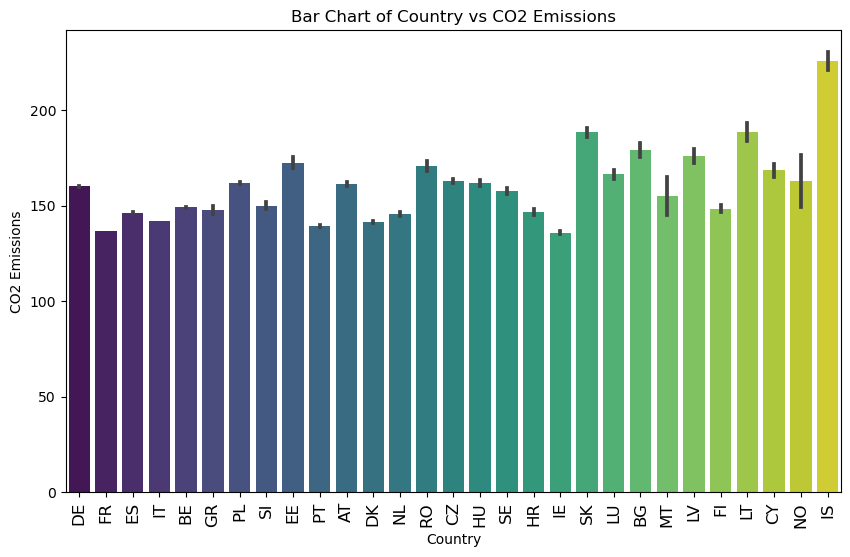

In [10]:
# Create a bar chart for Country vs Emissions
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='CO2 Emissions (per WLTP)', data=co2_filtered_df, palette='viridis')

# Add title and labels
plt.title('Bar Chart of Country vs CO2 Emissions')
plt.xlabel('Country')
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('CO2 Emissions')

Text(0, 0.5, 'CO2 Emissions')

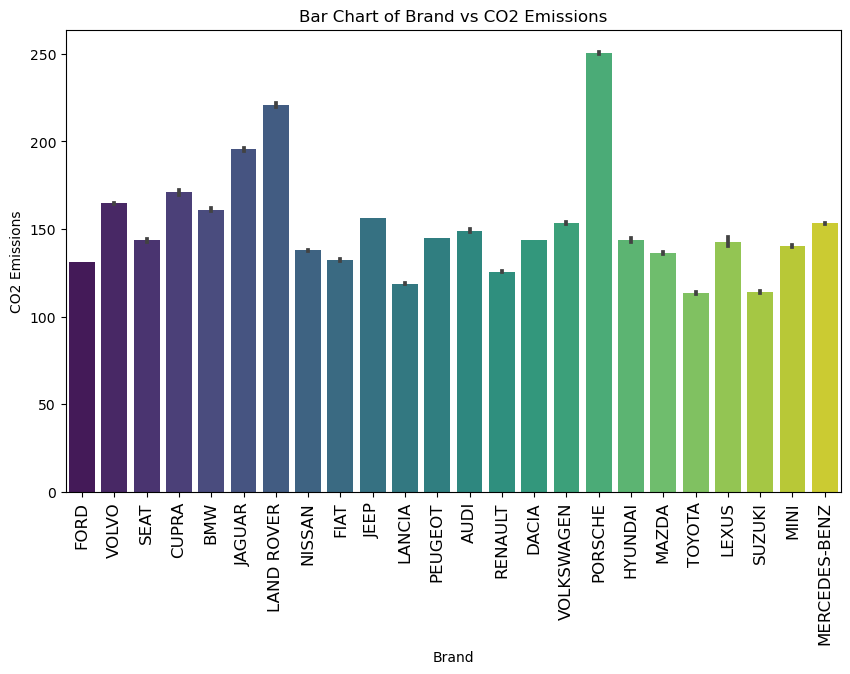

In [11]:
# Create a DataFrame for Brand vs. CO2 emissions
co2_gas_df = co2_filtered_df[co2_filtered_df['Fuel Type'] == 'PETROL']

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='CO2 Emissions (per WLTP)', data=co2_gas_df, palette='viridis')

# Add title and labels
plt.title('Bar Chart of Brand vs CO2 Emissions')
plt.xlabel('Brand')
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('CO2 Emissions')

Text(0, 0.5, 'Average Price')

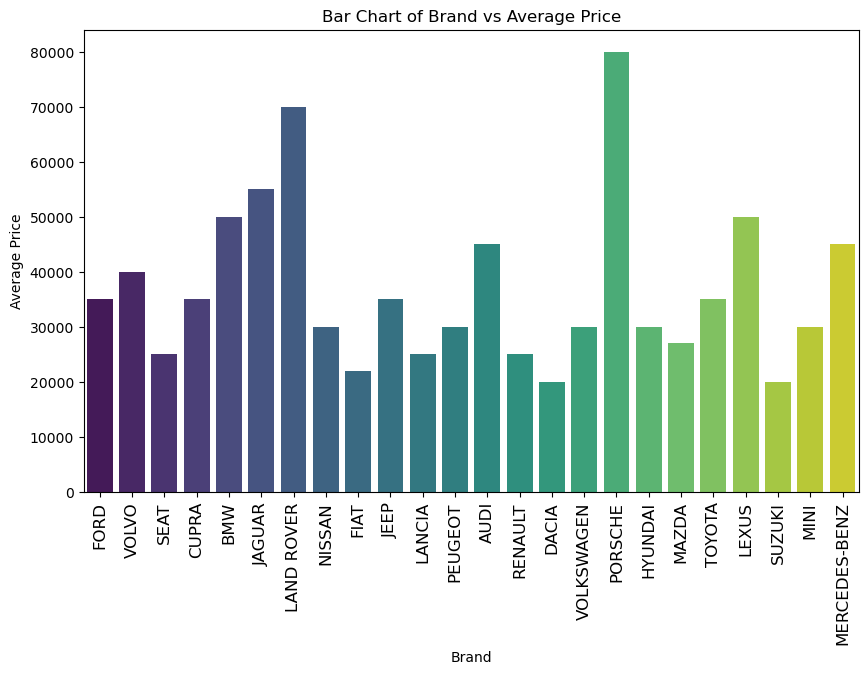

In [12]:
# Create a DataFrame for Brand vs. Average Price
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Average Price', data=co2_gas_df, palette='viridis')

# Add title and labels
plt.title('Bar Chart of Brand vs Average Price')
plt.xlabel('Brand')
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Average Price')

In [13]:
# Display unique values for Brand with gas only
unique_co2 = co2_gas_df['Brand'].unique()
unique_co2

array(['FORD', 'VOLVO', 'SEAT', 'CUPRA', 'BMW', 'JAGUAR', 'LAND ROVER',
       'NISSAN', 'FIAT', 'JEEP', 'LANCIA', 'PEUGEOT', 'AUDI', 'RENAULT',
       'DACIA', 'VOLKSWAGEN', 'PORSCHE', 'HYUNDAI', 'MAZDA', 'TOYOTA',
       'LEXUS', 'SUZUKI', 'MINI', 'MERCEDES-BENZ'], dtype=object)

In [14]:
# LabelEncoder for Country, Brand, Cn, and Fuel Type

co2_df_filt2 = co2_filtered_df.copy()
co2_df_filt2 = co2_df_filt2[co2_filtered_df['Fuel Type'] == 'PETROL']

# Create an instance of the label encoder

le_country = LabelEncoder()
le_brand = LabelEncoder()
le_cn = LabelEncoder()
le_ft = LabelEncoder()

# Encode the columns
co2_df_filt2['Country_Encoded'] = le_country.fit_transform(co2_df_filt2['Country'])
co2_df_filt2['Brand_Encoded'] = le_brand.fit_transform(co2_df_filt2['Brand'])
co2_df_filt2['Cn_Encoded'] = le_cn.fit_transform(co2_df_filt2['Cn'])
co2_df_filt2['Fuel Type_Encoded'] = le_ft.fit_transform(co2_df_filt2['Fuel Type'])

# Drop the original columns if needed
co2_df_encoded = co2_df_filt2.drop(['Erwltp (g/km)', 'Vehicle Identifier', 'Cn_Encoded', 'Fuel Type_Encoded', 'Year', 'Country', 'Brand', 'Cn', 'Fuel Type'], axis=1)
co2_df_encoded.head()

,Total fuel consumed (lifetime) (l),Total distance travelled (lifetime) (km),CO2 Emissions (per WLTP),Fuel consumption,Average Price,Country_Encoded,Brand_Encoded
0,440.70,6906.1,127.0,5.6,35000,5,5
1,794.16,8915.6,155.0,6.8,35000,5,5
2,373.82,6004.8,127.0,5.6,35000,5,5
3,299.77,4087.2,129.0,5.7,35000,5,5
4,498.75,6076.6,138.0,6.1,35000,5,5


Fuel consumption                            0.951639
Average Price                               0.733639
Total fuel consumed (lifetime) (l)          0.082201
Country_Encoded                             0.075397
Brand_Encoded                               0.062568
Total distance travelled (lifetime) (km)    0.057912
Name: CO2 Emissions (per WLTP), dtype: float64


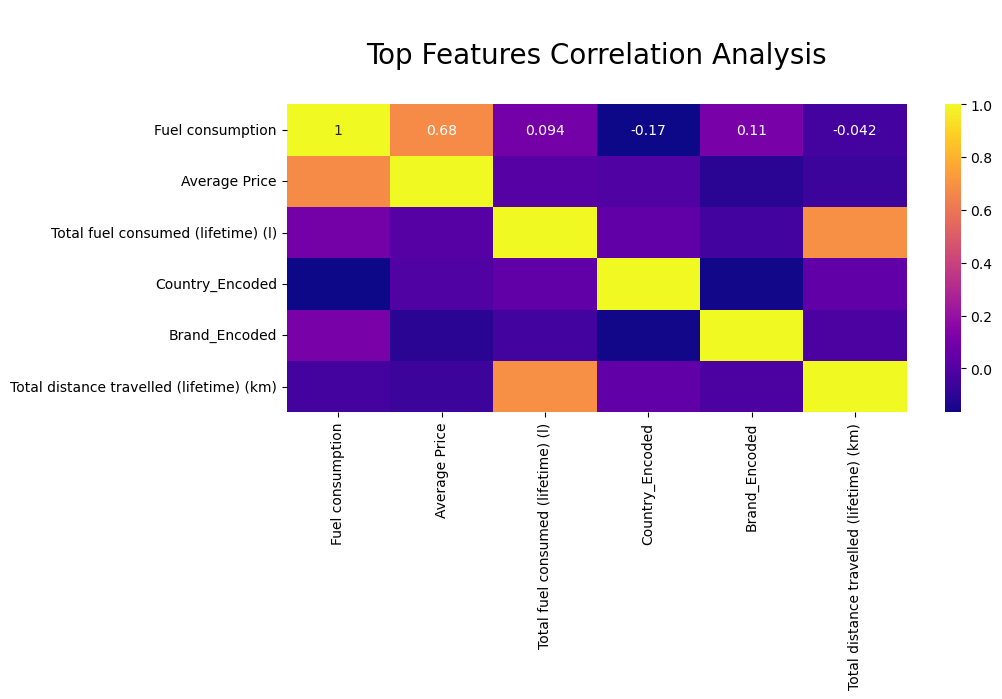

In [15]:
# Highest to lowest Correlation - CO2 Emissions data set
# 'CO2 Emissions' is a column in our dataframe
# Calculate correlation of features with 'CO2 Emissions (per WLTP)' and drop 'CO2 Emissions (per WLTP)' itself
corr = co2_df_encoded.corr()['CO2 Emissions (per WLTP)'].drop('CO2 Emissions (per WLTP)')

# Sort correlations by absolute values and take top 10
sort_corr = corr.abs().sort_values(ascending=False)[:10]

# Display the sorted correlations
print(sort_corr)

# Calculate the correlation matrix of the top correlated features
top_features = sort_corr.index.tolist()

# List of the top features
corr_top_features = co2_df_encoded[top_features].corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 4))

# Create a heatmap of the correlations of the top features
sns.heatmap(corr_top_features,
            annot=True,  # Annotate cells with correlation values
            xticklabels=corr_top_features.columns,
            yticklabels=corr_top_features.columns,
            cmap="plasma")

# Add a title to the heatmap
plt.title("\nTop Features Correlation Analysis\n", fontsize=20)

# Display the plot
plt.show()

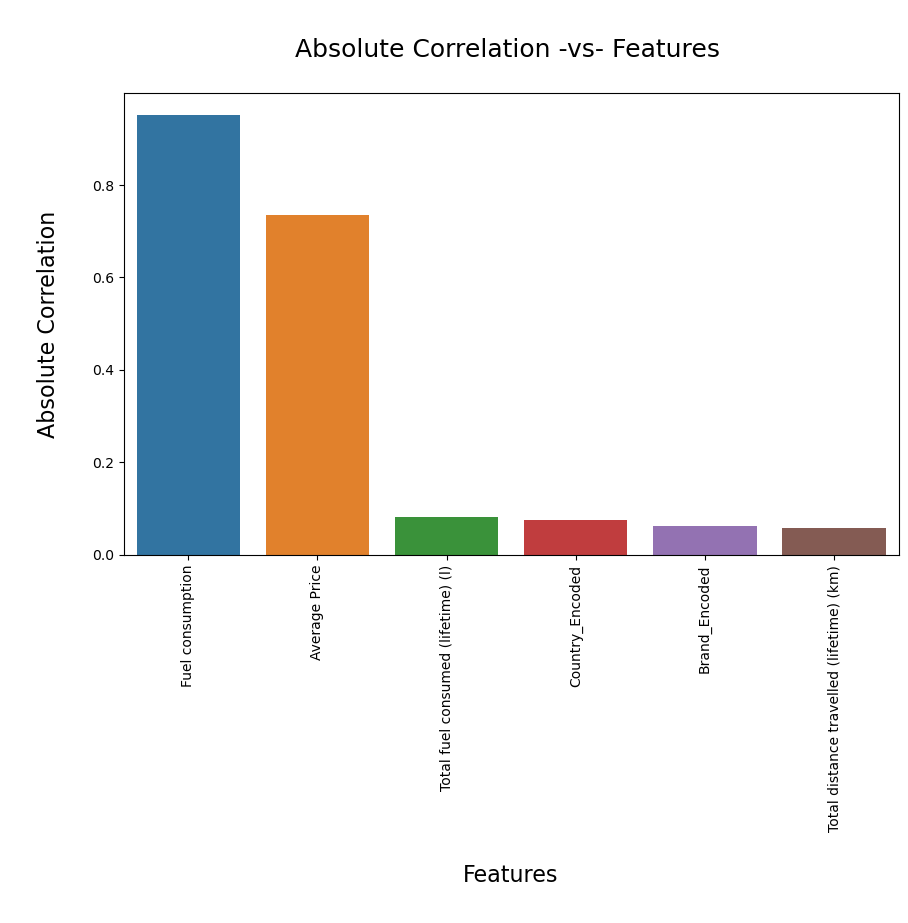

In [16]:
# Correlation / Bar chart - CO2 Emissions
# Show bar chart to compare correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=sort_corr.index, y=sort_corr)
plt.xticks(rotation=90)
plt.xlabel('\nFeatures\n', fontsize=16)
plt.ylabel('\nAbsolute Correlation\n', fontsize=16)
plt.title( f"\nAbsolute Correlation -vs- Features \n", fontsize=18)
plt.show()

/var/folders/__/tfzfy7bn5wg1by3trgv23_yr0000gn/T/ipykernel_76882/308938745.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=co2_df_encoded, x='Total fuel consumed (lifetime) (l)', y='CO2 Emissions (per WLTP)', palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


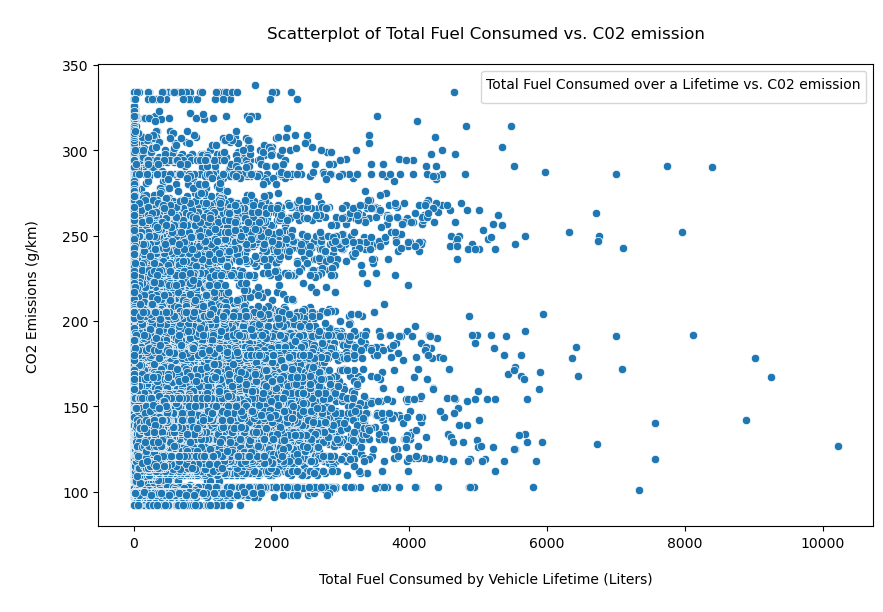

In [17]:
# Scatterplot of Total Fuel Consumed over a Lifetime vs. C02 emission  
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_df_encoded, x='Total fuel consumed (lifetime) (l)', y='CO2 Emissions (per WLTP)', palette='coolwarm')
plt.title('\nScatterplot of Total Fuel Consumed vs. C02 emission\n')
plt.xlabel('\nTotal Fuel Consumed by Vehicle Lifetime (Liters)\n')
plt.ylabel('\nCO2 Emissions (g/km)\n')
plt.legend(title='Total Fuel Consumed over a Lifetime vs. C02 emission')
plt.show()

/var/folders/__/tfzfy7bn5wg1by3trgv23_yr0000gn/T/ipykernel_76882/3067760792.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=co2_df_encoded, x='Total distance travelled (lifetime) (km)', y='Total fuel consumed (lifetime) (l)', palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


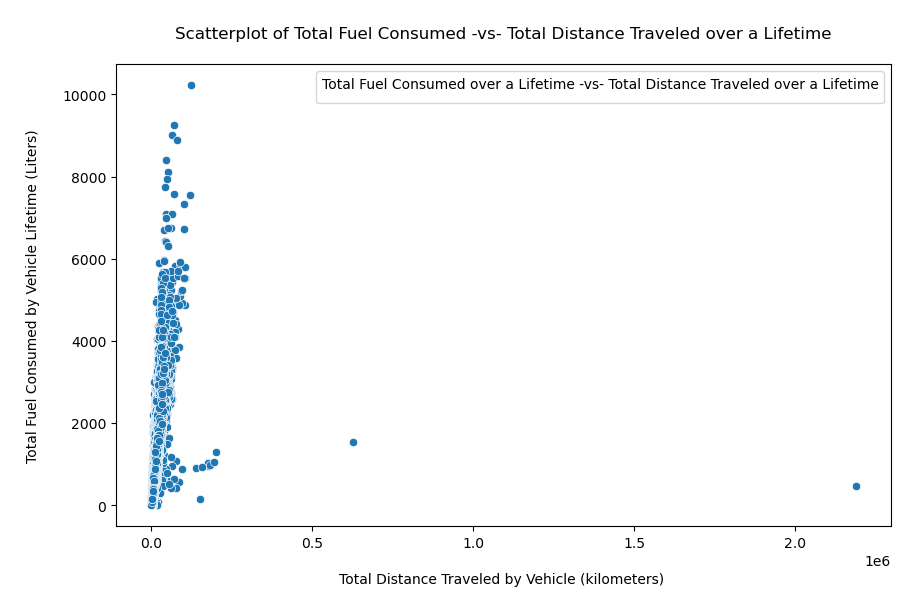

In [18]:
# Scatterplot of Total Fuel Consumed over a Lifetime vs. Total Distance Traveled over a Lifetime  
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_df_encoded, x='Total distance travelled (lifetime) (km)', y='Total fuel consumed (lifetime) (l)', palette='coolwarm')
plt.title('\nScatterplot of Total Fuel Consumed -vs- Total Distance Traveled over a Lifetime\n')
plt.xlabel('\nTotal Distance Traveled by Vehicle (kilometers) \n')
plt.ylabel('\nTotal Fuel Consumed by Vehicle Lifetime (Liters)\n')
plt.legend(title='Total Fuel Consumed over a Lifetime -vs- Total Distance Traveled over a Lifetime')
plt.show()

/var/folders/__/tfzfy7bn5wg1by3trgv23_yr0000gn/T/ipykernel_76882/1527038804.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=co2_df_encoded, x='Total distance travelled (lifetime) (km)', y='CO2 Emissions (per WLTP)', palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


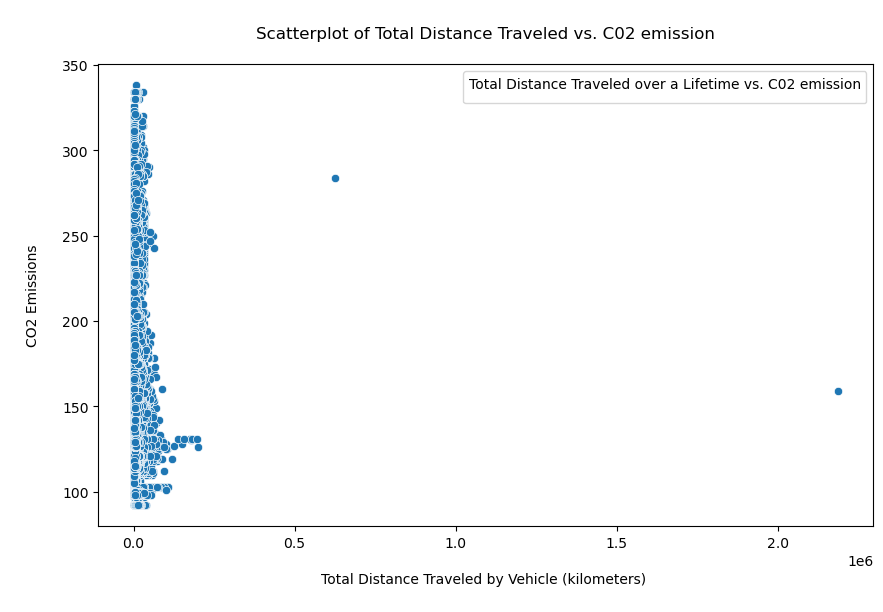

In [20]:
# Scatterplot of Total Distance Traveled over a Lifetime vs. C02 emission  
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_df_encoded, x='Total distance travelled (lifetime) (km)', y='CO2 Emissions (per WLTP)', palette='coolwarm')
plt.title('\nScatterplot of Total Distance Traveled vs. C02 emission\n')
plt.xlabel('\nTotal Distance Traveled by Vehicle (kilometers) \n')
plt.ylabel('\nCO2 Emissions\n')
plt.legend(title='Total Distance Traveled over a Lifetime vs. C02 emission')
plt.show()

/var/folders/__/tfzfy7bn5wg1by3trgv23_yr0000gn/T/ipykernel_76882/2513066404.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=co2_df_encoded, x='Average Price', y='CO2 Emissions (per WLTP)', palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


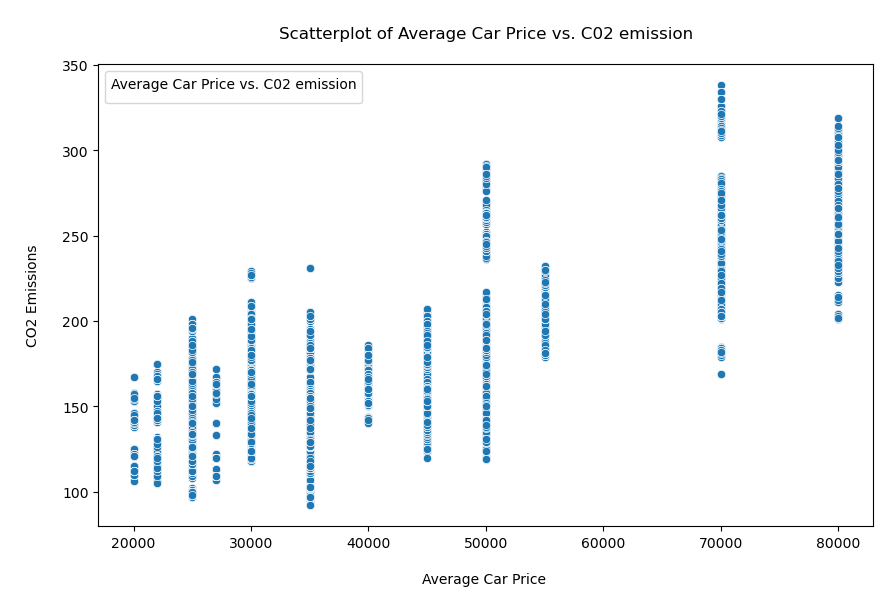

In [19]:
# Scatterplot of Average Car Price vs. C02 emission  
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_df_encoded, x='Average Price', y='CO2 Emissions (per WLTP)', palette='coolwarm')
plt.title('\nScatterplot of Average Car Price vs. C02 emission\n')
plt.xlabel('\nAverage Car Price \n')
plt.ylabel('\nCO2 Emissions\n')
plt.legend(title='Average Car Price vs. C02 emission')
plt.show()

In [21]:
# Drop the label to create the X data

X = co2_df_encoded.drop('CO2 Emissions (per WLTP)', axis=1)
X

,Total fuel consumed (lifetime) (l),Total distance travelled (lifetime) (km),Fuel consumption,Average Price,Country_Encoded,Brand_Encoded
0,440.70,6906.1,5.6,35000,5,5
1,794.16,8915.6,6.8,35000,5,5
2,373.82,6004.8,5.6,35000,5,5
3,299.77,4087.2,5.7,35000,5,5
4,498.75,6076.6,6.1,35000,5,5
...,...,...,...,...,...,...
807888,1070.58,13745.5,6.8,35000,5,5
807889,288.60,4683.0,5.7,35000,5,5
807891,394.51,6298.9,5.6,35000,5,5
807892,165.24,2138.8,5.7,35000,5,5


In [22]:
# Create the y set from the CO2 Emissions column

y = co2_df_encoded['CO2 Emissions (per WLTP)']
y


0         127.0
1         155.0
2         127.0
3         129.0
4         138.0
          ...  
807888    155.0
807889    129.0
807891    127.0
807892    129.0
807893    129.0
Name: CO2 Emissions (per WLTP), Length: 153172, dtype: float64

In [23]:
# Split the data into training and testing sets using random_state=1

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1)

In [24]:
# Scale the X data by using StandardScaler()

Scaler = StandardScaler().fit(X_train)
X_train_scale = Scaler.transform(X_train)
X_train_scale


array([[-0.02765935, -0.0166111 , -0.01531777, -0.0875112 , -0.80738514,
        -0.954173  ],
       [-0.82093181, -0.59914618,  3.25826071,  3.55014872, -0.80738514,
         0.79829346],
       [-0.81563351, -0.59875358,  1.78849078,  3.55014872,  0.89592806,
         0.79829346],
       ...,
       [-0.55028706, -0.34675676, -0.68339501, -1.13839073, -0.65253849,
        -1.10021188],
       [-0.22306831, -0.11192827, -1.08424135, -0.0875112 ,  0.89592806,
        -0.954173  ],
       [-0.81643807, -0.59835037, -0.34935639, -0.49169563,  0.89592806,
         1.52848781]])

In [25]:
# Transform the test dataset based on the fit from the training dataset

X_test_scale = Scaler.transform(X_test)
X_test_scale


array([[-0.5515822 , -0.49076707, -0.14893322, -0.89588006, -0.03315187,
         0.94433233],
       [ 2.44835152,  1.56189982,  0.51914402, -0.49169563, -0.80738514,
         0.36017684],
       [ 1.17648606,  0.81314593, -0.75020273, -0.0875112 ,  0.89592806,
        -0.954173  ],
       ...,
       [-0.72240315, -0.50877367, -1.2178568 , -0.0875112 , -0.03315187,
         1.38244894],
       [-0.82000951, -0.59839282, -0.88381818, -0.73420629, -1.58161842,
         0.0680991 ],
       [-0.59345835, -0.43090071, -0.21574094, -1.13839073, -0.03315187,
        -1.10021188]])

/Users/aljordan/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aljordan/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aljordan/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: 

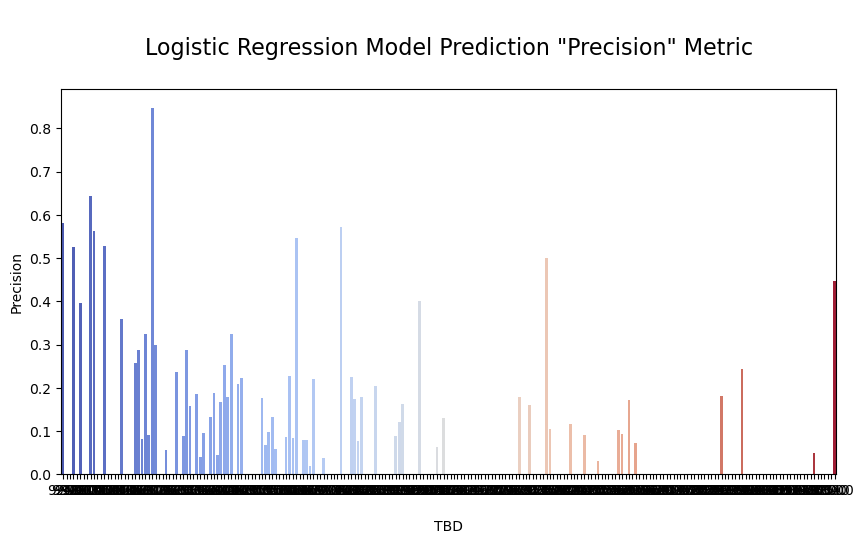

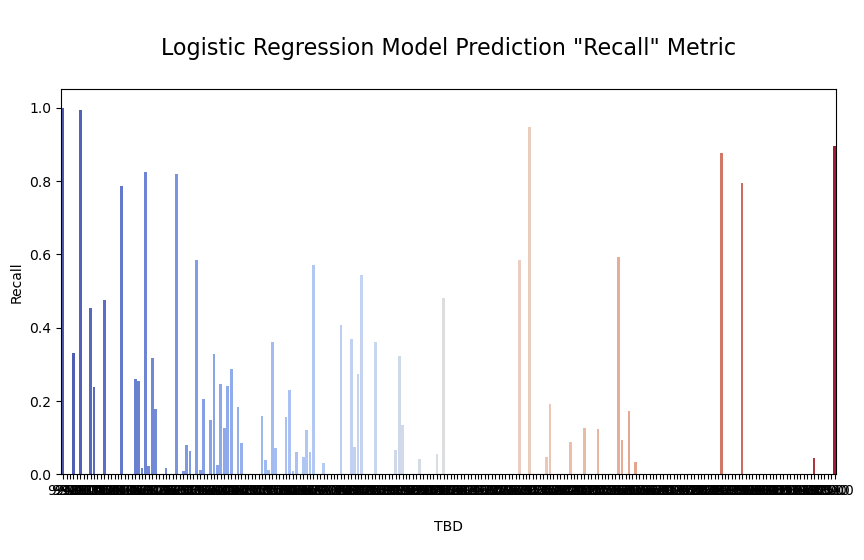

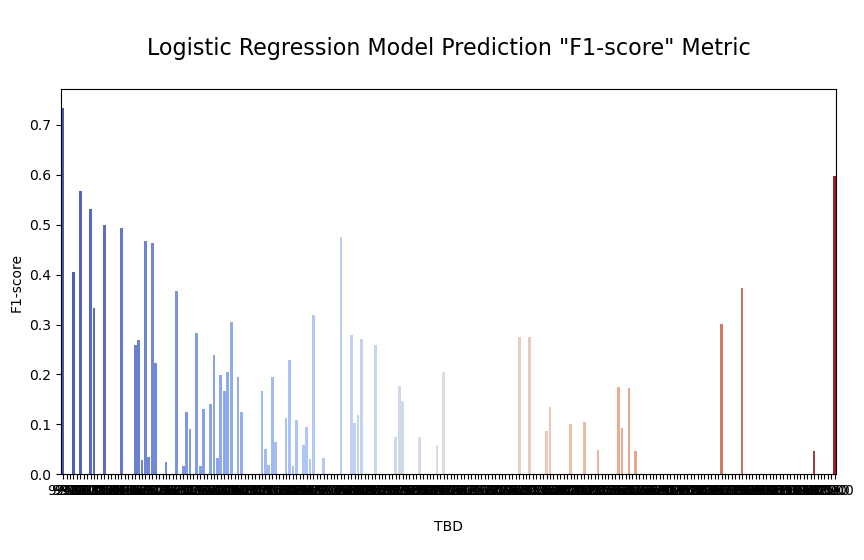

In [26]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train_scale, y_train)

# Make predictions on the test data
lr_predictions = lr_model.predict(X_test_scale)
lr_predictions

# Create a classification report
lr_cr = classification_report(y_test, lr_predictions, output_dict=True)

# Plot the classification report
# Convert the report to a DataFrame for plotting
df_lr_cr_report = pd.DataFrame(lr_cr).transpose()
df_lr_cr_report

classes = df_lr_cr_report.index[:-3]
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=classes, y=df_lr_cr_report[metric][:-3], palette='coolwarm')
    plt.title(f'\nLogistic Regression Model Prediction "{metric.capitalize()}" Metric\n', fontsize=16)
    plt.xlabel('\nTBD\n')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=0)
    plt.show()


/Users/aljordan/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aljordan/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aljordan/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


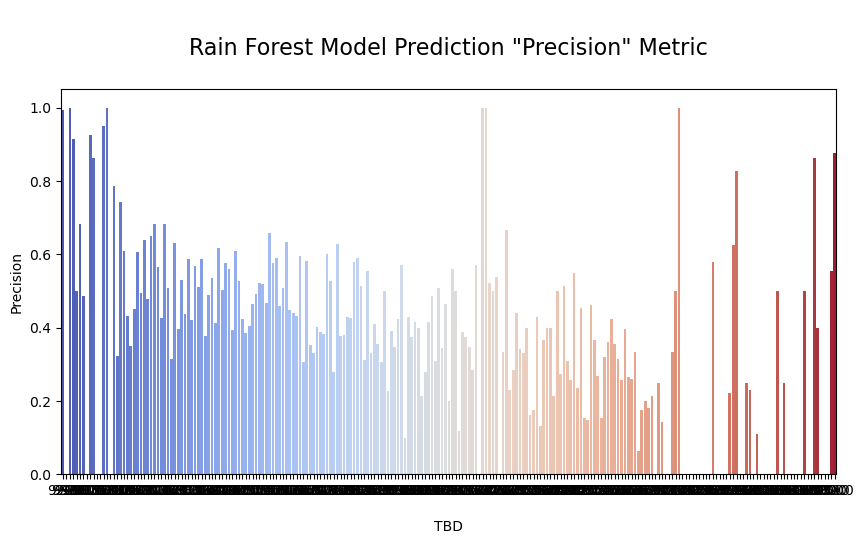

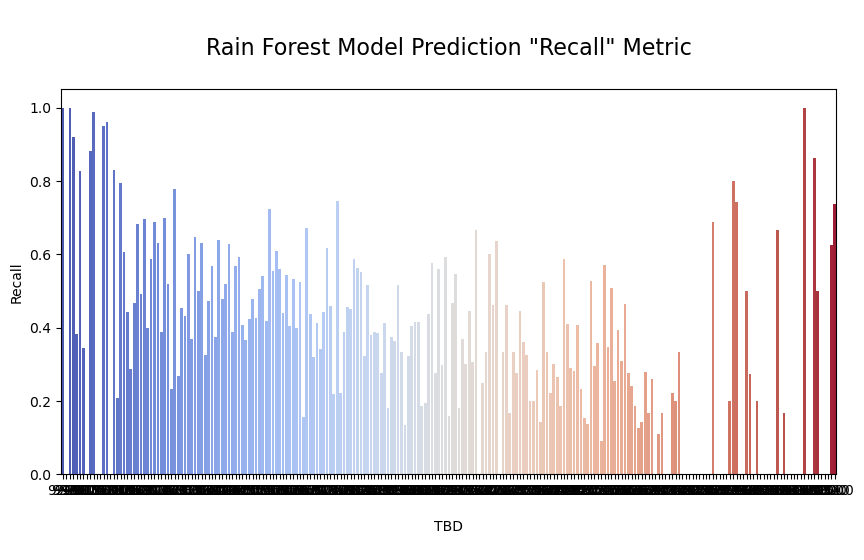

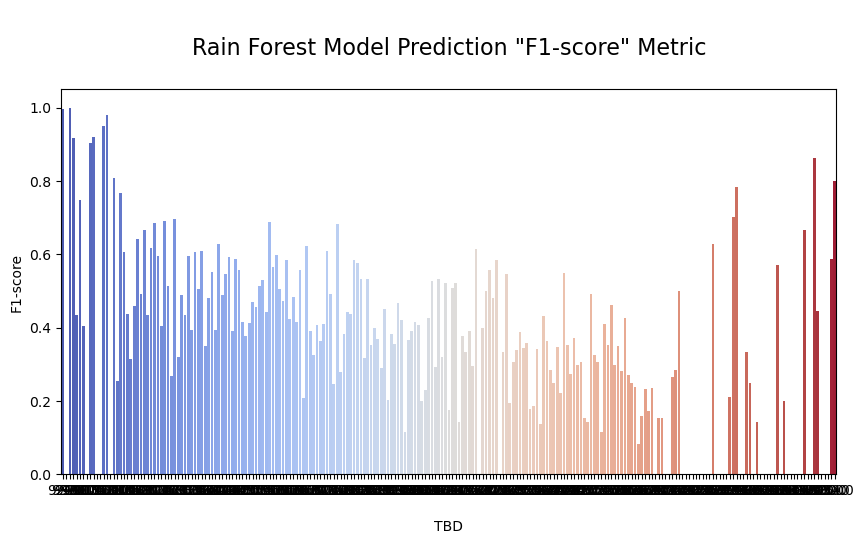

In [27]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scale, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test_scale)
rf_predictions

# Create a classification report
rf_cr = classification_report(y_test, rf_predictions, output_dict=True)

# Plot the classification report
# Convert the report to a DataFrame for plotting
df_rf_cr_report = pd.DataFrame(rf_cr).transpose()
df_rf_cr_report

classes = df_rf_cr_report.index[:-3]
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=classes, y=df_rf_cr_report[metric][:-3], palette='coolwarm')
    plt.title(f'\nRain Forest Model Prediction "{metric.capitalize()}" Metric\n', fontsize=16)
    plt.xlabel('\nTBD\n')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=0)
    plt.show()


In [28]:
# Validate the model by checking the model accuracy with model.score
print(f"Random Forest Model Training Accuracy: {rf_model.score(X_train_scale, y_train)}")
print(f"Random Forest Model Testing Accuracy: {rf_model.score(X_test_scale, y_test)}")

print(f"Logistic Regression Model Training Accuracy: {lr_model.score(X_train_scale, y_train)}")
print(f"Logistic Regression Model Testing Accuracy: {lr_model.score(X_test_scale, y_test)}")


Random Forest Model Training Accuracy: 0.9871168794992993
Random Forest Model Testing Accuracy: 0.526049147363748
Logistic Regression Model Training Accuracy: 0.19349924703383561
Logistic Regression Model Testing Accuracy: 0.19564933538766877


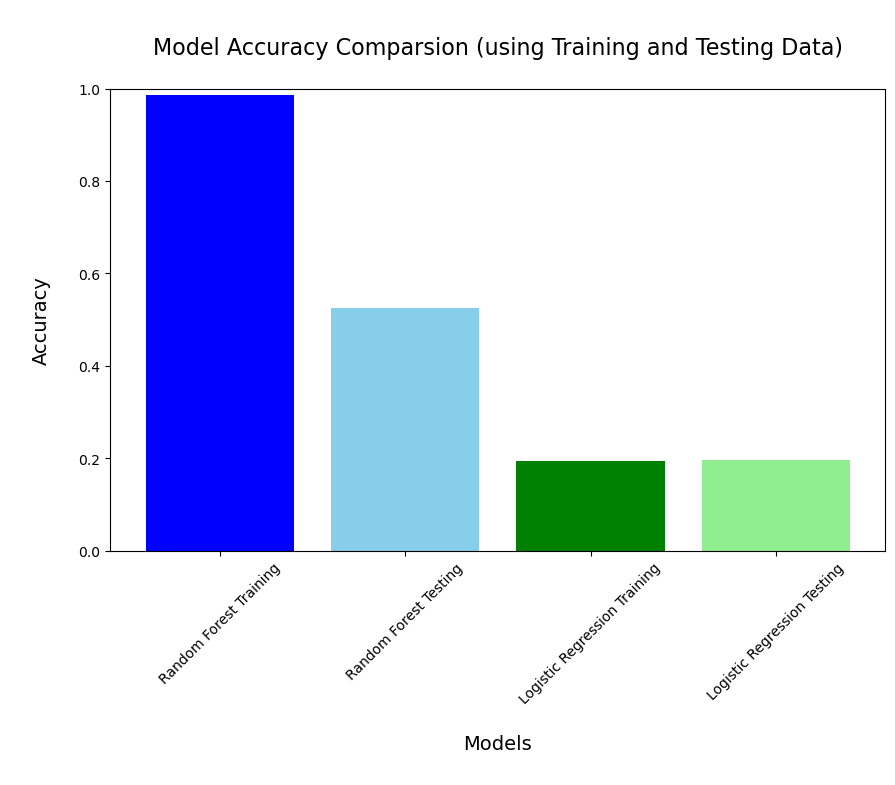

In [29]:
# Create a chart to compare Accuracy of each Model

# Model names
models = [
    'Random Forest Training', 
    'Random Forest Testing',
    'Logistic Regression Training',
    'Logistic Regression Testing'
    ]

# Model scores
scores = [
    rf_model.score(X_train_scale, y_train),
    rf_model.score(X_test_scale, y_test),
    lr_model.score(X_train_scale, y_train),
    lr_model.score(X_test_scale, y_test)
]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'skyblue', 'green', 'lightgreen', 'orange', 'lightsalmon', 'red', 'pink'])
plt.xticks(rotation=45)
plt.xlabel('\nModels\n', fontsize=14)
plt.ylabel('\nAccuracy\n', fontsize=14)
plt.title('\nModel Accuracy Comparsion (using Training and Testing Data)\n', fontsize=16)
plt.ylim(0, 1)
plt.show()